# Projeto: Ligações para o 911

Os dados contem os seguintes campos:
* lat: String Latitude
* lng: string Longitude
* desc: String Descrição da chamada de emergencia
* zip: String CEP
* titulo: String Titulo
* timeStamp: String AAAA-MM-DD HH-MM-SS
* twp: String: Township
* addr: String: Endereço
* e: String variavel Dummy (sempre 1)

# Dados e configuração

### Importando numpy e Pandas

In [1]:
import numpy as np
import pandas as pd

### Importando e configurando  Matplotlib inline

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### Lendo a base de dados com um dataframe pandas chamado DF

In [3]:
df = pd.read_csv('911.csv')

### Verificando a info() do DF

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 645716 entries, 0 to 645715
Data columns (total 9 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   lat        645716 non-null  float64
 1   lng        645716 non-null  float64
 2   desc       645716 non-null  object 
 3   zip        567493 non-null  float64
 4   title      645716 non-null  object 
 5   timeStamp  645716 non-null  object 
 6   twp        645434 non-null  object 
 7   addr       645716 non-null  object 
 8   e          645716 non-null  int64  
dtypes: float64(3), int64(1), object(5)
memory usage: 44.3+ MB


### Verifique o cabeçalho do DF

In [5]:
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:10:52,NEW HANOVER,REINDEER CT & DEAD END,1
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:29:21,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 14:39:21,NORRISTOWN,HAWS AVE,1
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 16:47:36,NORRISTOWN,AIRY ST & SWEDE ST,1
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 16:56:52,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1


### Top 5 ceps nas chamadas 911

In [6]:
df['zip'].value_counts().head(5)

19401.0    44247
19464.0    42630
19403.0    33934
19446.0    31323
19406.0    21865
Name: zip, dtype: int64

### Principais 5 municipios nas chamadas 911

In [7]:
df['twp'].value_counts().head(5)

LOWER MERION    54204
ABINGTON        38929
NORRISTOWN      36471
UPPER MERION    35098
CHELTENHAM      29774
Name: twp, dtype: int64

### Códigos exclusivos na coluna title

In [8]:
len(df['title'].unique()) # or df['title'].nunique()

147

In [9]:
df['title']

0             EMS: BACK PAINS/INJURY
1            EMS: DIABETIC EMERGENCY
2                Fire: GAS-ODOR/LEAK
3             EMS: CARDIAC EMERGENCY
4                     EMS: DIZZINESS
                     ...            
645711                 EMS: FRACTURE
645712    EMS: RESPIRATORY EMERGENCY
645713         EMS: SYNCOPAL EPISODE
645714    EMS: ALTERED MENTAL STATUS
645715              Fire: FIRE ALARM
Name: title, Length: 645716, dtype: object

## Criando novos recursos com a tabela Title...

### Na coluna title existem Razões/Departamentos, especificando antes do código do título ( EMS, FIRE, TRAFFIC) Usando .apply() com uma expressão lambda personalizada para criar uma nova coluna "Razão" que contem esses valores de string

In [10]:
df['title'].iloc[0]

'EMS: BACK PAINS/INJURY'

In [11]:
df['title'].iloc[0].split(':')

['EMS', ' BACK PAINS/INJURY']

In [12]:
df['title'].iloc[0].split(':')[0]

'EMS'

In [13]:
df['Reason'] = df['title'].apply(lambda title: title.split(':')[0])

In [14]:
df['Reason']

0          EMS
1          EMS
2         Fire
3          EMS
4          EMS
          ... 
645711     EMS
645712     EMS
645713     EMS
645714     EMS
645715    Fire
Name: Reason, Length: 645716, dtype: object

### Descobrindo o motivo mais comum para uma chamada do 911

In [15]:
df['Reason'].value_counts()

EMS        322880
Traffic    225213
Fire        97623
Name: Reason, dtype: int64

## Usando Seaborn para criar um countplot de chamadas 911

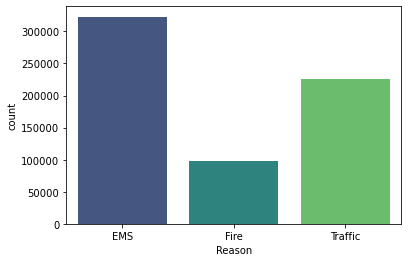

In [16]:
sns.countplot(x='Reason', data=df, palette='viridis')

In [17]:
df['timeStamp'].head()

0    2015-12-10 17:10:52
1    2015-12-10 17:29:21
2    2015-12-10 14:39:21
3    2015-12-10 16:47:36
4    2015-12-10 16:56:52
Name: timeStamp, dtype: object

In [18]:
type(df['timeStamp'].iloc[1])

str

### Usando pd.to_datatime para converter a coluna de strings em objetos DateTIme

In [19]:
df['timeStamp'] = pd.to_datetime(df['timeStamp'])

In [20]:
df['timeStamp']

0        2015-12-10 17:10:52
1        2015-12-10 17:29:21
2        2015-12-10 14:39:21
3        2015-12-10 16:47:36
4        2015-12-10 16:56:52
                 ...        
645711   2020-06-08 13:07:24
645712   2020-06-08 13:10:11
645713   2020-06-08 13:10:41
645714   2020-06-08 13:11:45
645715   2020-06-08 13:14:43
Name: timeStamp, Length: 645716, dtype: datetime64[ns]

In [21]:
type(df['timeStamp'].iloc[1])

pandas._libs.tslibs.timestamps.Timestamp

### Criando 3 novas colunas chamadas, Hour, Month, Day of Week

In [22]:
time = df['timeStamp'].iloc[3]

In [23]:
time.dayofweek

3

In [24]:
df['Hour'] = df['timeStamp'].apply(lambda x: x.hour)
df['Month'] = df['timeStamp'].apply(lambda x: x.month)
df['Day of Week'] = df['timeStamp'].apply(lambda x: x.dayofweek)

In [25]:
df['Day of Week'].value_counts()

4    100296
2     96565
3     96243
1     94849
0     93907
5     87112
6     76744
Name: Day of Week, dtype: int64

### Usando .map() para mapear os nomes das sequencias reais do dia da semana

In [26]:
dmap = {0:'Mon', 1:'Tue', 2:'Wed', 3:'Thu', 4:'Fri', 5:'Sat', 6:'Sun'}

In [27]:
df['Day of Week'] = df['Day of Week'].map(dmap)

In [28]:
df['Day of Week']

0         Thu
1         Thu
2         Thu
3         Thu
4         Thu
         ... 
645711    Mon
645712    Mon
645713    Mon
645714    Mon
645715    Mon
Name: Day of Week, Length: 645716, dtype: object

### Usando Seaborn para criar um countplot da coluna Day of Week com a tonalidade baseada na coluna Reason

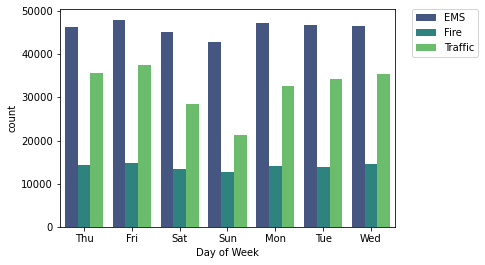

In [29]:
sns.countplot(x='Day of Week', hue='Reason', data=df, palette='viridis')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

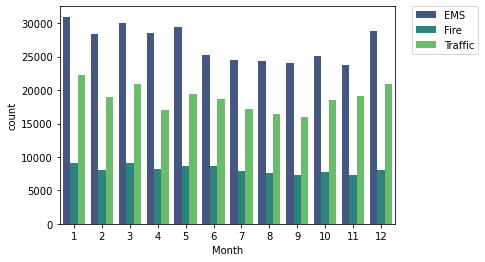

In [30]:
sns.countplot(x='Month', hue='Reason', data=df, palette='viridis')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

In [31]:
byMonth = df.groupby('Month').count()
byMonth.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Hour,Day of Week
Month,,,,,,,,,,,,
1,62336,62336,62336,55294,62336,62336,62312,62336,62336,62336,62336,62336
2,55427,55427,55427,48922,55427,55427,55405,55427,55427,55427,55427,55427
3,60027,60027,60027,53252,60027,60027,60001,60027,60027,60027,60027,60027
4,53671,53671,53671,47349,53671,53671,53655,53671,53671,53671,53671,53671
5,57509,57509,57509,50354,57509,57509,57474,57509,57509,57509,57509,57509


### Plot simples do DF indicando a contagem das chamadas por mes

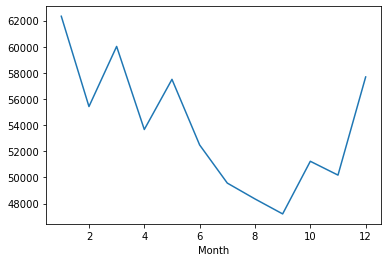

In [32]:
byMonth['Reason'].plot()

### Criando ummodelo linear no número de chamadas por mes usando Implot()

In [33]:
# Resetando o indice para Month deixar de ser indice
byMonth.reset_index()

,Month,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Hour,Day of Week
0,1,62336,62336,62336,55294,62336,62336,62312,62336,62336,62336,62336,62336
1,2,55427,55427,55427,48922,55427,55427,55405,55427,55427,55427,55427,55427
2,3,60027,60027,60027,53252,60027,60027,60001,60027,60027,60027,60027,60027
3,4,53671,53671,53671,47349,53671,53671,53655,53671,53671,53671,53671,53671
4,5,57509,57509,57509,50354,57509,57509,57474,57509,57509,57509,57509,57509
5,6,52489,52489,52489,45865,52489,52489,52462,52489,52489,52489,52489,52489
6,7,49571,49571,49571,43405,49571,49571,49550,49571,49571,49571,49571,49571
7,8,48359,48359,48359,42311,48359,48359,48335,48359,48359,48359,48359,48359
8,9,47213,47213,47213,41289,47213,47213,47196,47213,47213,47213,47213,47213
9,10,51240,51240,51240,44582,51240,51240,51220,51240,51240,51240,51240,51240


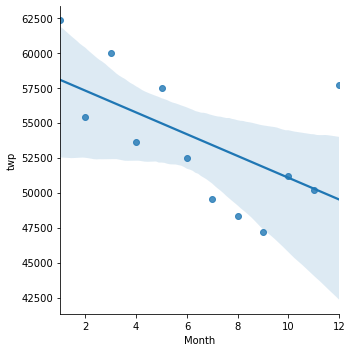

In [34]:
sns.lmplot(x='Month', y='twp', data=byMonth.reset_index())

### Criando coluna chamada Data que contem a data da coluna timeStamp

In [35]:
df['Date'] = df['timeStamp'].apply(lambda x:x.date())

In [36]:
df['Date']

0         2015-12-10
1         2015-12-10
2         2015-12-10
3         2015-12-10
4         2015-12-10
             ...    
645711    2020-06-08
645712    2020-06-08
645713    2020-06-08
645714    2020-06-08
645715    2020-06-08
Name: Date, Length: 645716, dtype: object

### Agrupando coluna Data com groupby, usando o count() e criando um grafico de contagens de chamadas

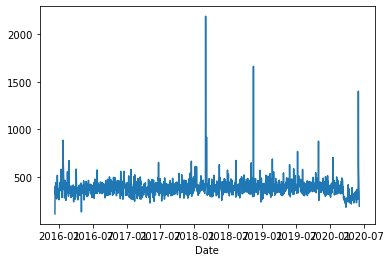

In [37]:
df.groupby('Date').count()['twp'].plot()

### Grafico representando cada Reason

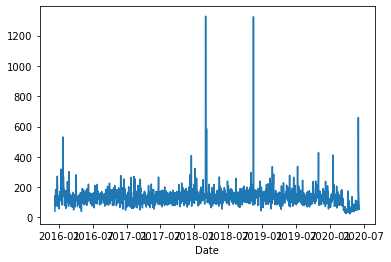

In [38]:
df[df['Reason'] == 'Traffic'].groupby('Date').count()['twp'].plot()

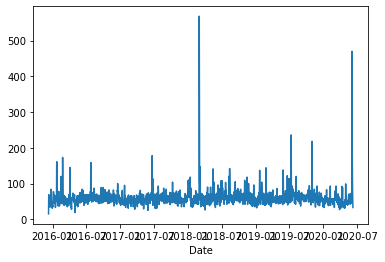

In [39]:
df[df['Reason'] == 'Fire'].groupby('Date').count()['twp'].plot()

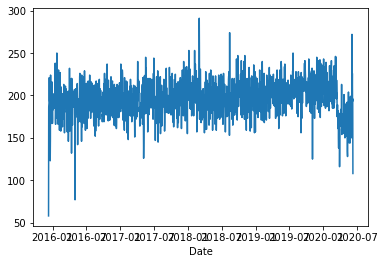

In [40]:
df[df['Reason'] == 'EMS'].groupby('Date').count()['twp'].plot()

### Criando mapas de calor

* Reestruturação de dados para que as colunas horas se torne o Dia da Semana

In [51]:
dayHour = df.groupby(by=['Day of Week', 'Hour']).count()['twp'].unstack()
dayHour

Hour,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
Day of Week,,,,,,,,,,,,,,,,,,,,,
Fri,1923,1586,1413,1265,1296,1594,2611,4064,4927,5168,...,6198,6849,6907,6932,5519,4919,4255,3781,3325,2772
Mon,1850,1516,1322,1244,1306,1794,2622,4345,5399,5595,...,5488,6025,6154,6234,5273,4346,3662,3144,2577,2010
Sat,2365,2000,1839,1545,1405,1522,1839,2430,3371,4217,...,5290,5045,5070,5058,4843,4634,4022,3774,3121,2881
Sun,2364,2086,1886,1578,1432,1451,1689,2332,2931,3623,...,4609,4334,4442,4384,4258,4034,3627,3060,2541,2266
Thu,1672,1371,1374,1198,1242,1728,2750,4354,5202,5268,...,5917,6315,6221,6781,5374,4579,3957,3409,2773,2305
Tue,1659,1408,1282,1174,1206,1688,2715,4314,5492,5404,...,5756,6086,6309,6705,5482,4463,3727,3300,2602,2061
Wed,1613,1428,1222,1220,1091,1549,2590,4554,5359,5291,...,5896,6367,6608,6898,5527,4575,4015,3437,2743,2148


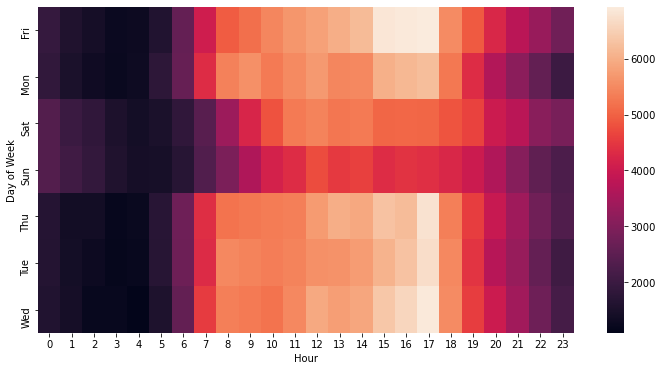

In [52]:
plt.figure(figsize=(12,6))
sns.heatmap(dayHour)

### Clustermap

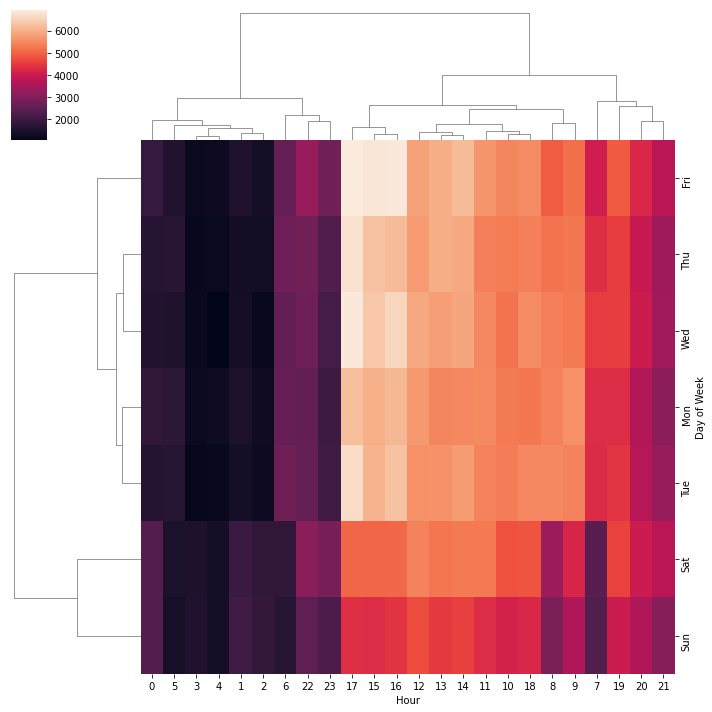

In [48]:
sns.clustermap(dayHour)

### Repetindo os plots usando o mes em vez das horas

In [50]:
dayMonth = df.groupby(by=['Day of Week', 'Month']).count()['twp'].unstack()

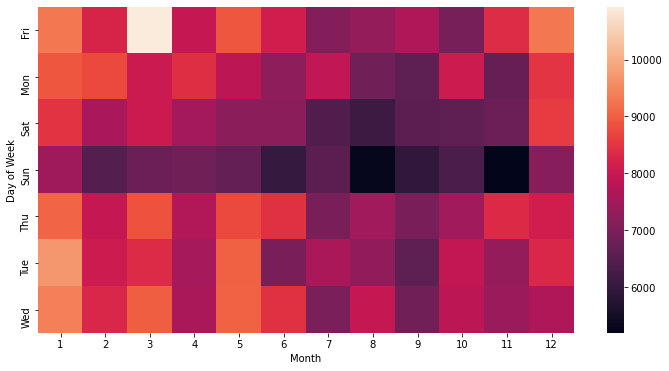

In [53]:
plt.figure(figsize=(12,6))
sns.heatmap(dayMonth)

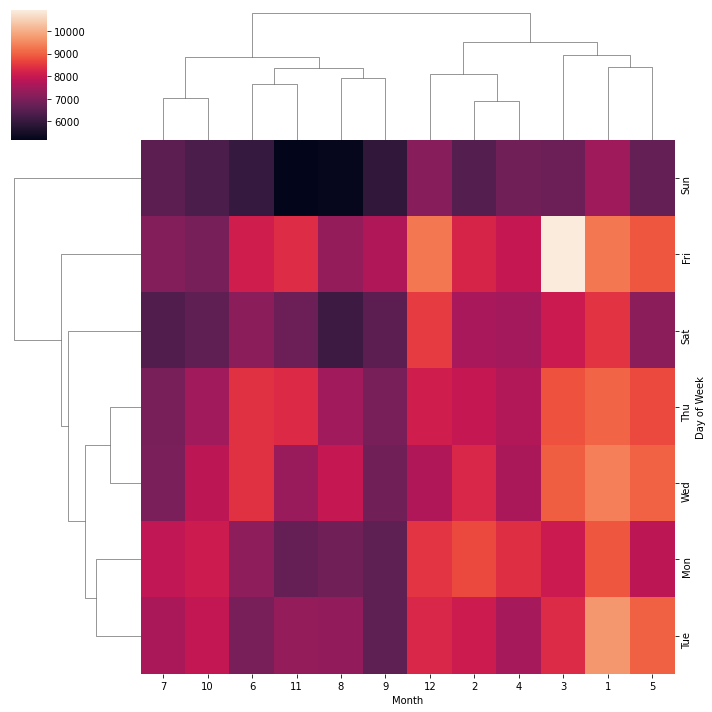

In [55]:
sns.clustermap(dayMonth)